In [1]:
import pandas as pd
data=pd.read_csv('kyphosis.csv')
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


# EDA

In [2]:
data=pd.get_dummies(data,columns=['Kyphosis'],drop_first=True)

In [3]:
data.rename({'Kyphosis_present':'Kyphosis'},axis=1,inplace=True)

In [4]:
data.head()

,Age,Number,Start,Kyphosis
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


<AxesSubplot:>

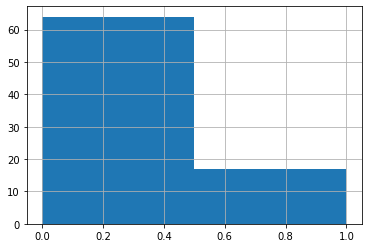

In [5]:
# visulation target values are balance or not
data['Kyphosis'].hist(bins=2)

In [6]:
# split data

In [7]:
# dividing in to tow part depend and independ variable
x=data.drop('Kyphosis',axis=1).loc[:,'Age':'Start']
y=data.Kyphosis
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: uint8

In [11]:
from imblearn.over_sampling import RandomOverSampler
le=RandomOverSampler(random_state=0)
x_res,y_res=le.fit_resample(x,y)
dir(imblearn.over_sampling)

NameError: name 'imblearn' is not defined

In [ ]:
plt.hist(y_res,bins=2)

In [ ]:
# train_test_split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=0)
X_train.shape
y_train.shape

In [ ]:
# data fit in to testing dataset to predict 
from sklearn .linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred=logreg.predict(X_test)
Y_pred



In [ ]:
# confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cnf_matrix=confusion_matrix(y_test,Y_pred)

print(cnf_matrix)
print('accuracy : ',accuracy_score(y_test,Y_pred))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
class_name=[0,1]
fig,ax=plt.subplots()
fig_size=np.arange(len(class_name))
plt.xticks(fig_size,class_name)
plt.yticks(fig_size,class_name)

sns.heatmap(cnf_matrix,annot=True,cbar=False,square=True,cmap='Blues',fmt='g')
ax.xaxis.set_label_position('top')

plt.tight_layout()
plt.title('confusiotn matrix')
plt.xlabel('possitve Negative',color='red')
plt.ylabel('Negative postive',color='blue')
plt.show()

In [ ]:
print(classification_report(y_test,Y_pred))

In [ ]:
print('accuracy',accuracy_score(y_test,Y_pred))

In [ ]:
# Roc plot reciver operacting charaterstic
from sklearn import metrics
Y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,Y_pred_proba)
auc=metrics.roc_auc_score(y_test,Y_pred_proba)
plt.plot(fpr,tpr,label="data da"+str(auc))
plt.legend(loc=4)
plt.xlabel('y_test')
plt.ylabel('x_test')
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
t=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=uint8)

In [25]:
print(confusion_matrix(y_test,y_pred))

[[14  1]
 [ 0 24]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.96      1.00      0.98        24

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [28]:
print('score',accuracy_score(y_test,y_pred)*100)

score 97.43589743589743


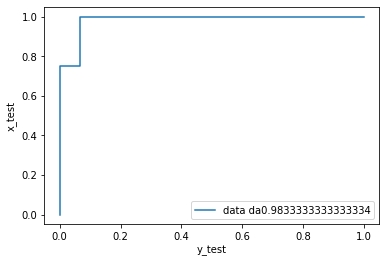

In [36]:
# roc # reciver operating characteristicsRandomOverSampler
Y_pred_proba=model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,Y_pred_proba)
auc=metrics.roc_auc_score(y_test,Y_pred_proba)
plt.plot(fpr,tpr,label="data da"+str(auc))
plt.legend(loc=4)
plt.xlabel('y_test')
plt.ylabel('x_test')
plt.show()